# Código de imágenes de pocas hojas

Este Scrip esta diseñado para análizar los datos obtenidos a partir de las zonas donde se presentan la enfermedad en hojas de banano extraidas de la zona bananera del Magdalena. Con esto se iniciara una busqueda en diferentes imágenes de estos valores

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Las imágenes se encuentran a partir de 560 hasta 875

In [10]:
img_RGB2 = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0560.JPG",1)
img_RGB = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0560.JPG",0)
img_GRE = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0562.TIF",0)
img_BLU = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0561.TIF",0)
img_NIR = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0565.TIF",0)
img_RED = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0563.TIF",0)
img_REG = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0564.TIF",0)
width,height=img_RGB.shape
print(img_RGB.shape)

(1300, 1600)


In [13]:

# importamos funciones de estabilización de imágenes
def estabilizador_imagen(imagen_base, imagen_a_estabilizar, radio = 0.75, error_reproyeccion = 4.0, coincidencias = False):
        """Esta clase devuelve una secuencia de imágenes tomadas de la cámara estabilizada con respecto a la primera imagen"""
        
        # Se obtienen los puntos deinterés
        
        (kpsBase, featuresBase) = obtener_puntos_interes(imagen_base)
        (kpsAdicional, featuresAdicional) = obtener_puntos_interes(imagen_a_estabilizar)
        # Se buscan las coincidencias        
        
        M = encontrar_coincidencias(imagen_base, imagen_a_estabilizar, kpsBase, kpsAdicional, featuresBase, featuresAdicional, radio)
        
        if M is None:
            print("pocas coincidencias")
            return None
        
        if len(M) > 4:
            # construct the two sets of points
            # M2 = cv2.getPerspectiveTransform(ptsA,ptsB)
            (H, status) = encontrar_H_RANSAC_Estable(M, kpsBase, kpsAdicional, error_reproyeccion)
            estabilizada = cv2.warpPerspective(imagen_base,H,(imagen_base.shape[1],imagen_base.shape[0]))
            return estabilizada
        print("sin coincidencias")
        return None
    #--------------------------------------------------------------------------
def obtener_puntos_interes(imagen):
    f =cv2.SIFT_create()
    (kps, features) =f.detectAndCompute(imagen, None)
    return kps, features

def encontrar_coincidencias(img1, img2, kpsA, kpsB, featuresA, featuresB, ratio):
        """Metodo para estimar la homografia"""
        
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
        matches = []
#        
#        # loop over the raw matches
        for m in rawMatches:
#            # ensure the distance is within a certain ratio of each
#            # other (i.e. Lowe's ratio test)
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx, m[0].queryIdx))
        
#        print (matches)
        return matches
    
def encontrar_H_RANSAC_Estable( matches, kpsA, kpsB, reprojThresh):
        """Metodo para aplicar una H a una imagen y obtener la proyectividad"""
        
        if len(matches) > 4:
            # construct the two sets of points
            ptsA = np.float32([kpsA[i].pt for (_, i) in matches])
            ptsB = np.float32([kpsB[i].pt for (i, _) in matches])
    
            # compute the homography between the two sets of points
            (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)
            
            return (H, status)

# Experimento
1) Se realizara alineación de las imágenes con respecto al RGB
2) Se extraeran datos en pequeñas matrices de la enfermedad
3) Se comrparan estos valores rpesentados en imágenes de cultivos productivos en salidas de campo normales

In [14]:
b_RGB = cv2.resize(img_RGB, (width, height), interpolation=cv2.INTER_LINEAR)
b_GRE = cv2.resize(img_GRE, (width, height), interpolation=cv2.INTER_LINEAR)
base_NIR = cv2.resize(img_NIR, (width, height), interpolation=cv2.INTER_LINEAR)
b_RED = cv2.resize(img_RED, (width, height), interpolation=cv2.INTER_LINEAR)
b_REG = cv2.resize(img_REG, (width, height), interpolation=cv2.INTER_LINEAR)
b_BLU = cv2.resize(img_BLU, (width, height), interpolation=cv2.INTER_LINEAR)
b_RGB2 = cv2.resize(img_RGB2, (width, height), interpolation=cv2.INTER_LINEAR)


stb_GRE = estabilizador_imagen(b_GRE, b_RGB)
stb_RGB = b_RGB
stb_RED = estabilizador_imagen(b_RED, b_RGB)
stb_REG = estabilizador_imagen(b_REG, b_RGB)
stb_BLU = estabilizador_imagen(b_BLU, b_RGB)
stb_NIR=estabilizador_imagen(base_NIR, b_RGB)
stb_RGB2 = estabilizador_imagen(b_RGB2, b_RGB)

# Verificación

    Proyectamos las 7 imágenes para hacer su comparativa con el siguientes orden:

    RGB(a color)  NIR  REG
    R             G     B
    
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)

ax1.imshow(...)

ax2 = fig.add_subplot(2,2,2)

ax2.imshow(...)

ax3 = fig.add_subplot(2,2,3)

ax3.imshow(...)

ax4 = fig.add_subplot(2,2,4)

ax4.imshow(...)

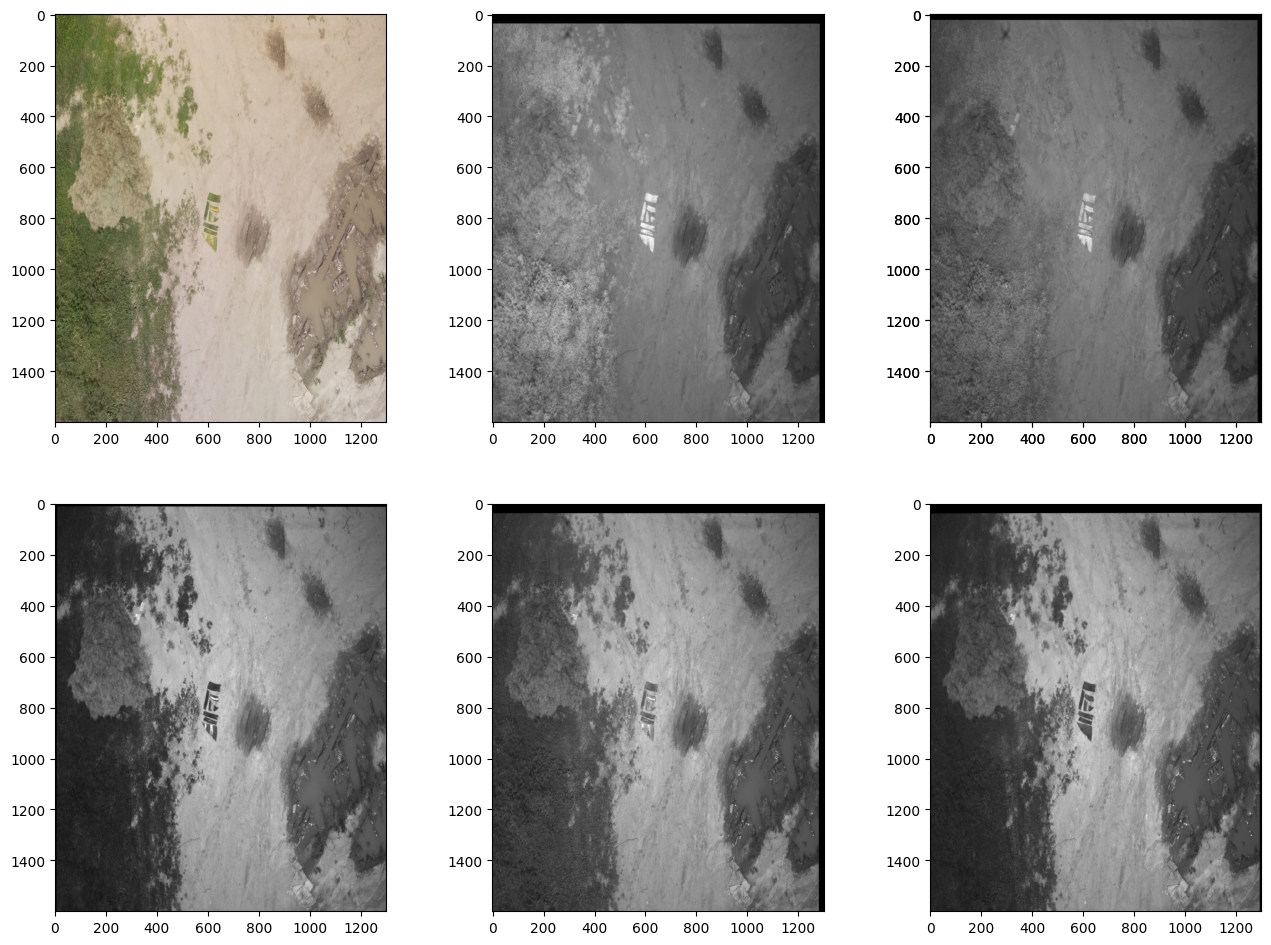

In [22]:

grafica=plt.figure(figsize=[16,18])

rgb=grafica.add_subplot(3,3,1)
rgb.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

nir=grafica.add_subplot(3,3,2)
nir.imshow(stb_NIR,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

red=grafica.add_subplot(3,3,4)
red.imshow(stb_RED,cmap='gray')

Green=grafica.add_subplot(3,3,5)
Green.imshow(stb_GRE,cmap='gray')

blue=grafica.add_subplot(3,3,6)
blue.imshow(stb_BLU,cmap='gray')



# Comprobando 
Realizamos la función Merge para obtener un RGB con la combinación de las capas R, g y b

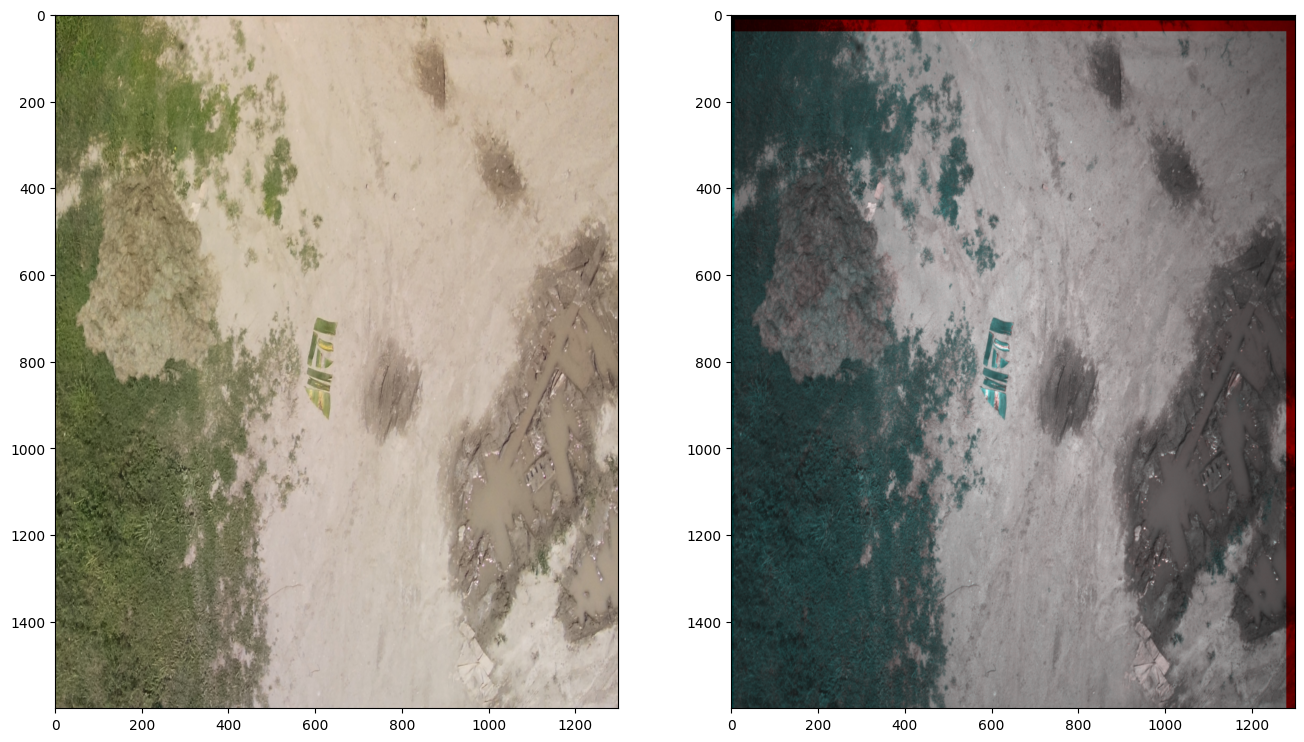

In [24]:
merged_fix_stb1 = cv2.merge((stb_RED,stb_GRE, stb_GRE))

grafica_com=plt.figure(figsize=[16,18])

rgb2=grafica_com.add_subplot(1,2,1)
rgb2.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

rgb2=grafica_com.add_subplot(1,2,2)
rgb2.imshow(merged_fix_stb1) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  


Podemos notar que las bandas resaltan el daño de la enfermedad en las bandas del rojo, procedemos a utilizar imágenes de menor altura para obtener valores de la enfermedad

# Prueba 2

Se procede a obtener datos de las imágenes 860 - 620(mejor 610) - 590-580